### Customer Segmentation with K-Means

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [34]:
X = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]
X = np.nan_to_num(X)
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [35]:
from sklearn.cluster import KMeans # Modelling using SKLearn
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels[:5])

[1 2 4 1 0]


In [36]:
df["Clus_label"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_label
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,4
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,0


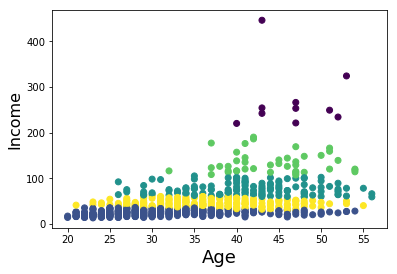

In [46]:
import matplotlib.pyplot as plt # VIsualizing
plt.scatter(df['Age'], df['Income'], c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [53]:
df.loc[df['Clus_label'] == 0].head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_label
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2,0
198,199,47,3,16,221,15.792,23.104,1.0,NBA026,17.6,0
207,208,43,1,25,242,1.636,4.656,0.0,NBA016,2.6,0
443,444,51,2,31,249,4.273,15.149,0.0,NBA014,7.8,0
532,533,43,4,18,446,16.031,12.959,1.0,NBA014,6.5,0


In [54]:
df.loc[df['Clus_label'] == 1].head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_label
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3,1
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3,1
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5,1
12,13,24,1,7,18,0.526,0.643,0.0,NBA000,6.5,1
13,14,46,1,6,30,1.415,3.865,NaN,NBA019,17.6,1


In [55]:
df.loc[df['Clus_label'] == 2].head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_label
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8,2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9,2
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6,2
10,11,44,3,8,88,0.285,5.083,1.0,NBA010,6.1,2
18,19,44,1,18,61,2.806,3.782,NaN,NBA000,10.8,2


In [56]:
df.loc[df['Clus_label'] == 3].head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_label
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0,3
24,25,37,4,10,123,3.022,18.257,0.0,NBA018,17.3,3
39,40,39,3,16,126,1.405,7.163,NaN,NBA010,6.8,3
41,42,48,3,17,113,3.376,10.184,0.0,NBA026,12.0,3
43,44,37,5,9,177,0.888,9.555,0.0,NBA016,5.9,3


In [57]:
df.loc[df['Clus_label'] == 4].head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Clus_label
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9,4
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6,4
11,12,34,2,9,40,0.374,0.266,NaN,NBA003,1.6,4
19,20,36,1,16,32,0.544,2.944,NaN,NBA013,10.9,4
21,22,36,3,10,43,0.961,4.629,0.0,NBA004,13.0,4
